In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.io.wavfile import read, write
from IPython.display import Audio
import math
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## Load Audio

In [2]:
#Audio
file_audio=('../audios/recording.wav')
fs,x=read(file_audio)
x=x/float(max(abs(x)))
x=x-np.mean(x)
t=np.arange(0,float(len(x))/fs,1/fs)
#Audio(x,rate=fs)

## Load Audio

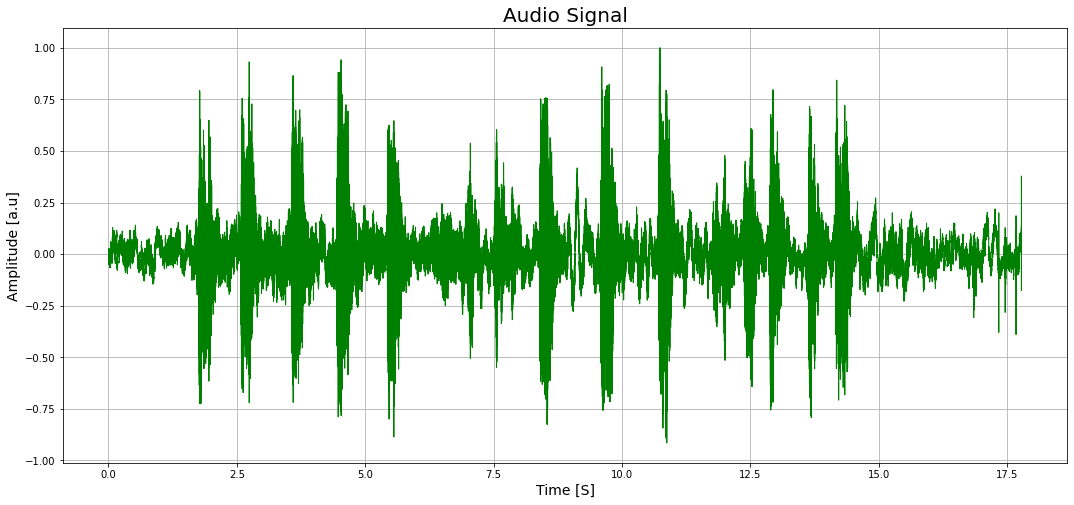

In [3]:
plt.figure(figsize=(18,8))
plt.plot(t,x,linewidth=1,color="g")
plt.xlabel("Time [S]",fontsize=14)
plt.ylabel("Amplitude [a.u]",fontsize=14)
plt.title("Audio Signal",fontsize=20)
plt.grid()
plt.show()

## Parameters FIR Windowing Method

In [4]:
#Parameters from the input form
fc1=2000
fc2=10000
ripple=0.003
BW=300
Adb=0

ftype="Lowpass"
window="Default"

#fs=16000

## Normalize Frequencies, Calculare the ripple (dB) and Determines the Number of Filter Components

In [5]:
#Normalize the frequencies
wc1=(2*np.pi*fc1)/fs
wc2=(2*np.pi*fc2)/fs

bwn=(2*np.pi*BW)/fs

#Ripple in dB
rdb=20*np.log10(ripple)

#Choose the order of the filter (M)
if (rdb>=-13):                #Rectangular
    M=((4*np.pi)/bwn)-1
elif (rdb>=-25):              #Triangular
    M=(8*np.pi)/bwn
elif (rdb>=-31):  	          #Hann
    M=(8*np.pi)/bwn
elif (rdb>=-41):              #Hamming
    M=(8*np.pi)/bwn
else:                         #Blackman
    M=(12*np.pi)/bwn

M=math.ceil(M)
if (M%2==0):
    M+=1
    
#Create the samples vector
n=np.arange(int(-M/2),int(M/2+1))

## Determine Band Pass and Sets the Window

In [6]:
#Determines the Filter type 
if (ftype=="Lowpass"):
    hx=(wc1/np.pi)*np.sinc(wc1*n/np.pi)
    hx[int(M/2)]=(wc1/np.pi)
elif (ftype=="Highpass"):
    hx=-(wc1/np.pi)*np.sinc(wc1*n/np.pi)
    hx[int(M/2)]=1-(wc1/np.pi)
elif (ftype=="Bandpass"):
    hx=((wc2/np.pi)*np.sin(n*wc2))/(n*wc2)-((wc1/np.pi)*np.sin(n*wc1))/(n*wc1)
    hx[int(M/2)]=(1/np.pi)*(wc2-wc1)
elif (ftype=="Bandstop"):
    hx=((wc1/np.pi)*np.sin(n*wc1))/(n*wc1)-((wc2/np.pi)*np.sin(n*wc2))/(n*wc2)
    hx[int(M/2)]=1-((1/np.pi)*(wc2-wc1))

#Determine the window
if (window=="Default"):
    if (rdb>=-13):                     #Rectangular
        win=np.ones(len(hx))
    elif (rdb>=-25):                   #Triangular
        win=signal.triang(len(hx))
    elif (rdb>=-31):                   #Hann
        win=signal.hann(len(hx))
    elif (rdb>=-41):                   #Hamming
        win=signal.hamming(len(hx))
    else:                              #Blackman
        win=signal.blackman(len(hx))
elif (window=="Hamming"):
    win=signal.hamming(len(hx))
elif (window=="Hann"):
    win=signal.hann(len(hx))
elif (window=="Square"):
    win=np.ones(len(hx))
elif (window=="Blackman"):
    win=signal.blackman(len(hx))
elif (window=="Bartlett"):
    win=signal.triang(len(hx))

## Output Filter

In [7]:
hn=hx*win
A=np.sqrt(10**(0.1*Adb))
hn=hn*A

w_win,H_win=signal.freqz(hn,1,whole=True, worN=1024)

## Calculates the Filter's Components

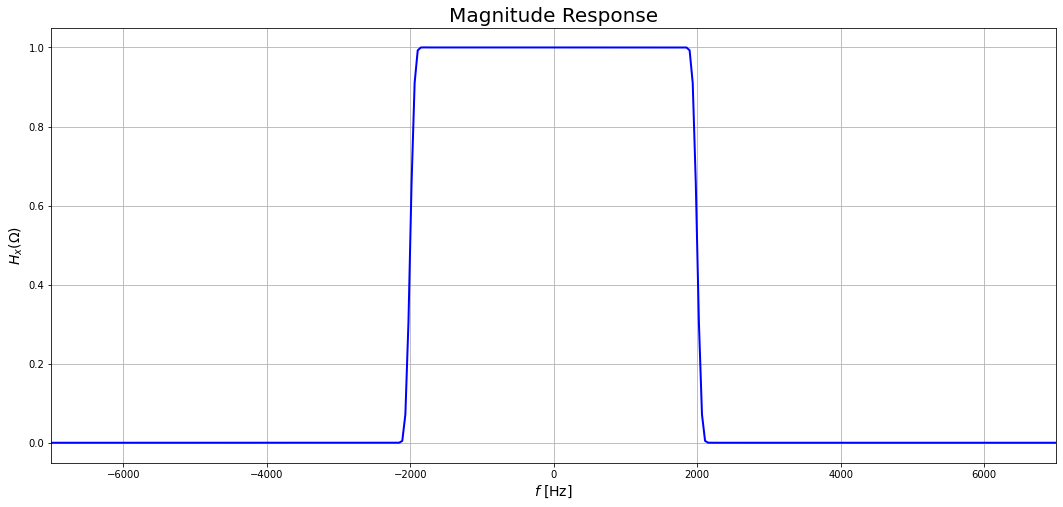

In [8]:
plt.figure(figsize=(18,8))
plt.plot((w_win-np.pi)*fs/(2*np.pi),np.abs(np.fft.fftshift(H_win)),linewidth=2,color="b")
plt.xlim(-fc1-5000,fc1+5000)
plt.xlabel("$f$ [Hz]",fontsize=14)
plt.ylabel("$H_x (\Omega)$",fontsize=14)
plt.title("Magnitude Response",fontsize=20)
plt.grid()
plt.show()

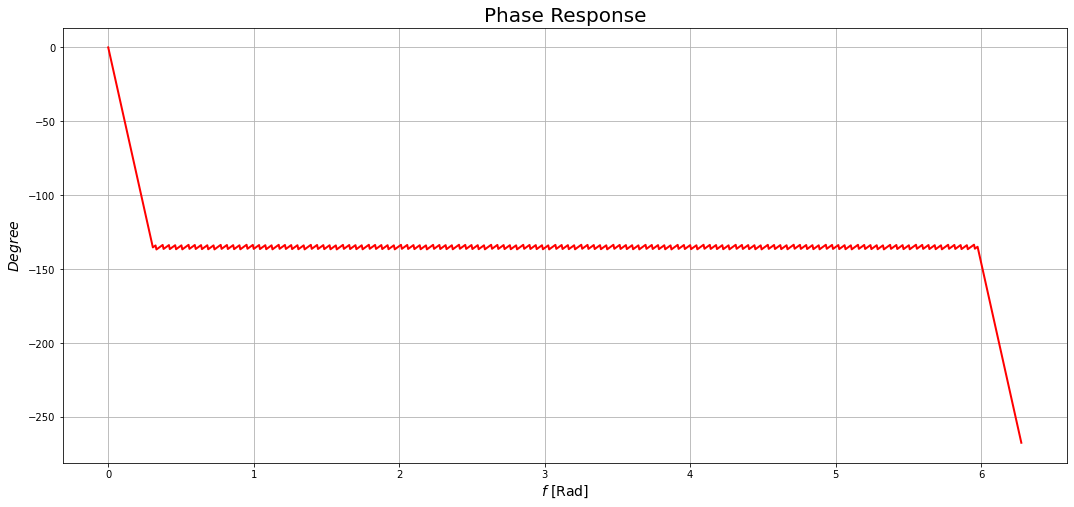

In [9]:
angles=np.unwrap(np.angle(H_win))

plt.figure(figsize=(18,8))
plt.plot(w_win,angles,linewidth=2,color="r")
plt.xlabel("$f$ [Rad]",fontsize=14)
plt.ylabel("$Degree$",fontsize=14)
plt.title("Phase Response",fontsize=20)
plt.grid()
plt.show()

In [10]:
y=signal.lfilter(hn,1,x)              # x is the audio
#Audio(y,rate=fs)

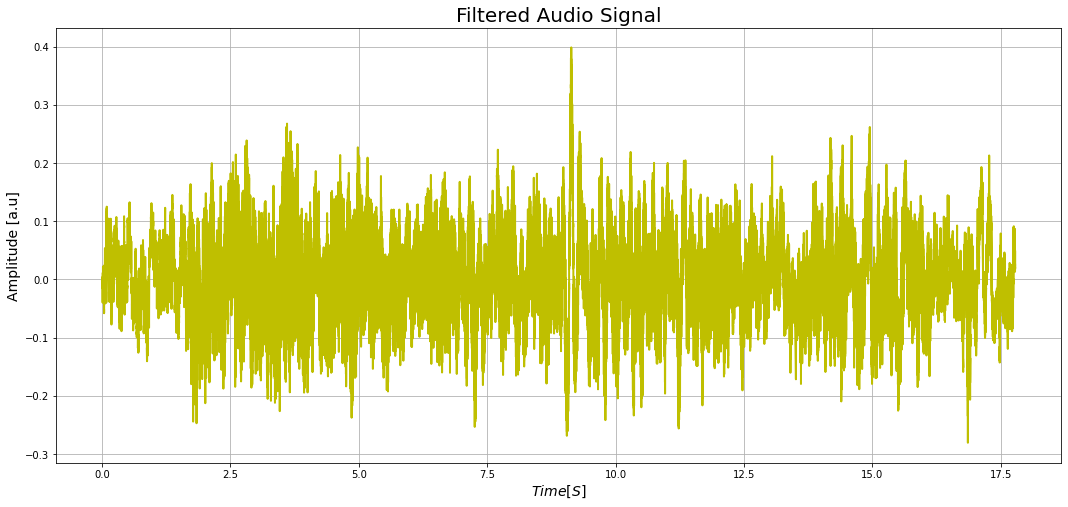

In [11]:
plt.figure(figsize=(18,8))
plt.plot(t,y,linewidth=1,color="g")
plt.xlabel("$Time [S]$",fontsize=14)
plt.ylabel("Amplitude [a.u]",fontsize=14)
plt.title("Filtered Audio Signal",fontsize=20)
plt.grid()
plt.show()